# **Car Price Prediction with Machine Learning**

Car price prediction with machine learning is a common use case in the field of data science and artificial intelligence. The goal is to build a predictive model that can estimate the price of a car based on various features or attributes associated with the car.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("CAR_PRICE_T3.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Checking for null data

df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
#checking list of columns
df.columns.to_list()


['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [6]:
#to check simple statistic
print("the length of the data is : ",len(df))
df.describe()


the length of the data is :  205


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
#combining carlength + carwidth + carheight as car_volume
df["car_volume"] = df["carlength"] * df["carwidth"] * df["carheight"]

df = df.drop(columns=["carlength","carwidth","carheight"])

In [8]:
#Removing Outliers
numerical_columns = df.select_dtypes(exclude=['object']).columns

def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[~((df[cols] < lower_bound) | (df[cols] > upper_bound)).any(axis=1)]

df = remove_outliers(df, numerical_columns)
df_copy = df


In [9]:
df.select_dtypes(include=["object"])
print(df["CarName"].value_counts())
print("\n ")
print (" We have 102 variation for 139 dataset. It seems that CarName format is Car_Brand *space* Car_type  We will be using Car Brand instead of car type to gave more generalized view")
df["CarBrand"] = df["CarName"].str.split(" ").str[0]

##droping the CarName Columns
df = df.drop(columns = ["CarName"],axis =1 )


toyota corona          5
toyota corolla         5
mazda 626              3
toyota mark ii         3
honda accord           2
                      ..
maxda rx3              1
isuzu D-Max V-Cross    1
isuzu MU-X             1
honda civic (auto)     1
volvo diesel           1
Name: CarName, Length: 104, dtype: int64

 
 We have 102 variation for 139 dataset. It seems that CarName format is Car_Brand *space* Car_type  We will be using Car Brand instead of car type to gave more generalized view


In [10]:
# fueltype
print (df["fueltype"].value_counts())
print(" \n")
print("It seems that the option always gas, and hence there is no other variation and other distinguishable categories, hence we will drop the columns")

df = df.drop(columns = ["fueltype"],axis = 1 )


gas    142
Name: fueltype, dtype: int64
 

It seems that the option always gas, and hence there is no other variation and other distinguishable categories, hence we will drop the columns


In [11]:

print (df["aspiration"].value_counts())

## we will use get_dummies for this


std      128
turbo     14
Name: aspiration, dtype: int64


In [12]:


door_number_replacement = {"two" : 2 ,
                           "four" : 4}

df = df.replace({"door_number":door_number_replacement})

print("we are replacing door because it can be represented as number /")


we are replacing door because it can be represented as number /


In [14]:

df["carbody"].unique()
## we will use dummies for this


array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [15]:
df["drivewheel"].unique()


array(['rwd', 'fwd', '4wd'], dtype=object)

In [16]:
print(df["enginelocation"].unique())

df = df.drop(columns = ["enginelocation"], axis = 1 )


print(" \n")
print("We will drop this because no other variation and other distinguishable categories, hence we will drop the columns")


['front']
 

We will drop this because no other variation and other distinguishable categories, hence we will drop the columns


In [17]:
print(df["enginetype"].unique())
#we will use one_hot_encoding for this


['dohc' 'ohcv' 'ohc' 'rotor' 'l']


In [19]:
print(df["cylindernumber"].unique())

cylindernumber_replacement = {"four" : 4,
                            "six" : 6,
                            "five": 5,
                            "two" : 2 }

df = df.replace({"cylindernumber" : cylindernumber_replacement})

print("\n")
print("We replace cylindernumber from string to integer")


['four' 'six' 'five' 'two']


We replace cylindernumber from string to integer


In [20]:
#Final dataset
df.head()


,car_ID,symboling,aspiration,doornumber,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_volume,CarBrand
0,1,3,std,two,convertible,rwd,88.6,2548,dohc,4,...,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904,alfa-romero
1,2,3,std,two,convertible,rwd,88.6,2548,dohc,4,...,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904,alfa-romero
2,3,1,std,two,hatchback,rwd,94.5,2823,ohcv,6,...,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640,alfa-romero
3,4,2,std,four,sedan,fwd,99.8,2337,ohc,4,...,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956,audi
4,5,2,std,four,sedan,4wd,99.4,2824,ohc,5,...,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832,audi


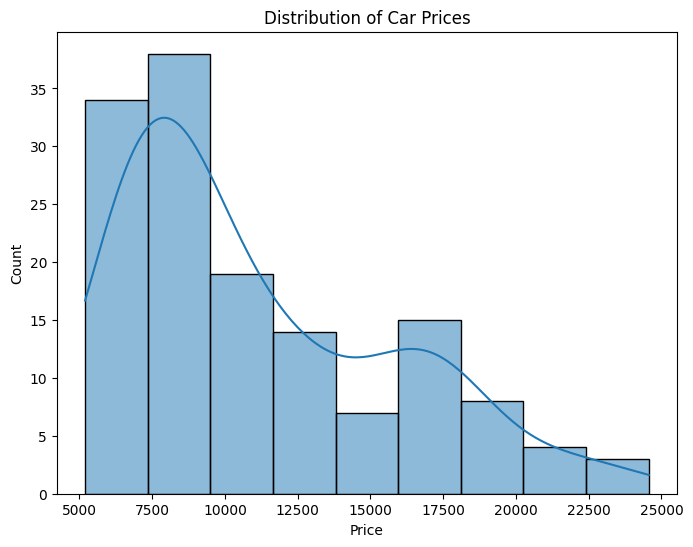

In [21]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric = df.select_dtypes(exclude=["object"])
numeric = numeric.drop("price", axis=1)
dropped_vars = []

for i in range(14):
    vif = pd.DataFrame()
    vif["Variable"] = numeric.columns
    vif["VIF"] = [variance_inflation_factor(numeric.values, i) for i in range(numeric.shape[1])]
    if (vif["VIF"].max()) >= 10:
        new_columns = vif.sort_values(by="VIF", ascending=False)[1:]['Variable'].unique().tolist()
        print(vif.sort_values(by="VIF", ascending=False))
        print("\n \n \n \n \n ")
        dropped_vars.append(vif.sort_values(by="VIF", ascending=False).iloc[0, 0])
        numeric = numeric[new_columns]

final_columns = vif["Variable"].unique().tolist()
print(vif)


            Variable          VIF
2          wheelbase  2539.455756
6          boreratio  1451.579121
12        highwaympg   975.937645
11           citympg   722.399377
5         enginesize   541.855306
8   compressionratio   471.476384
13        car_volume   459.889557
3         curbweight   427.006502
7             stroke   415.735257
4     cylindernumber   401.705306
10           peakrpm   317.250374
9         horsepower    77.544417
0             car_ID     5.024262
1          symboling     2.792053

 
 
 
 
 
            Variable         VIF
1         highwaympg  965.170809
0          boreratio  870.134843
2            citympg  716.564602
4   compressionratio  467.742257
6         curbweight  411.322049
3         enginesize  395.131804
5         car_volume  346.823089
9            peakrpm  317.203848
8     cylindernumber  284.442373
7             stroke  270.499957
10        horsepower   77.367109
11            car_ID    5.022475
12         symboling    2.558611

 
 
 
 
 
      

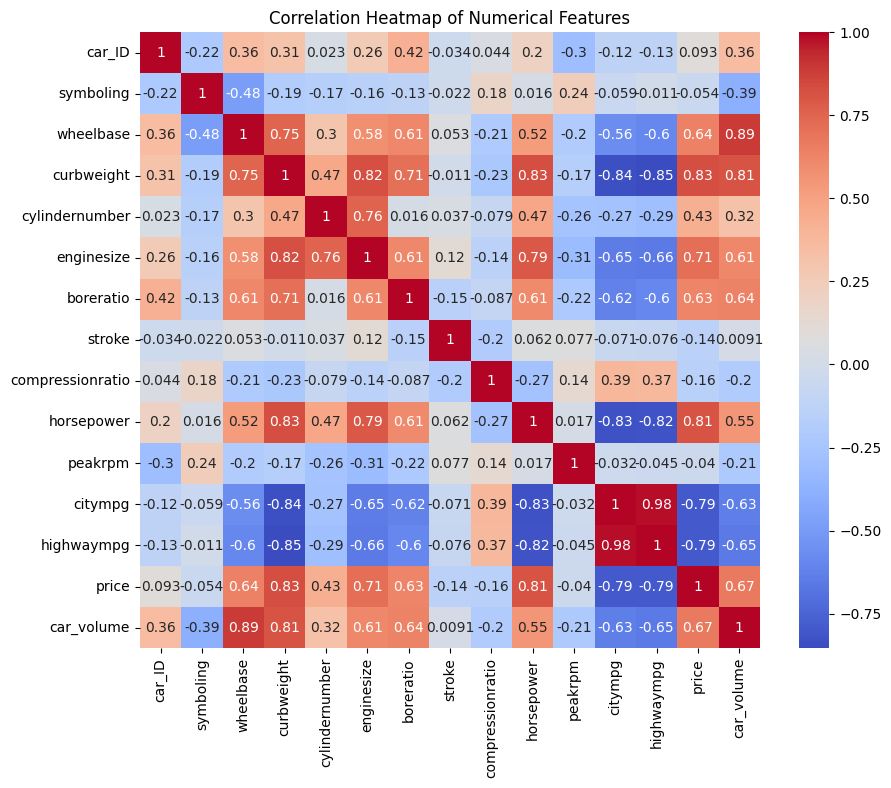

In [23]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(exclude=['object']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

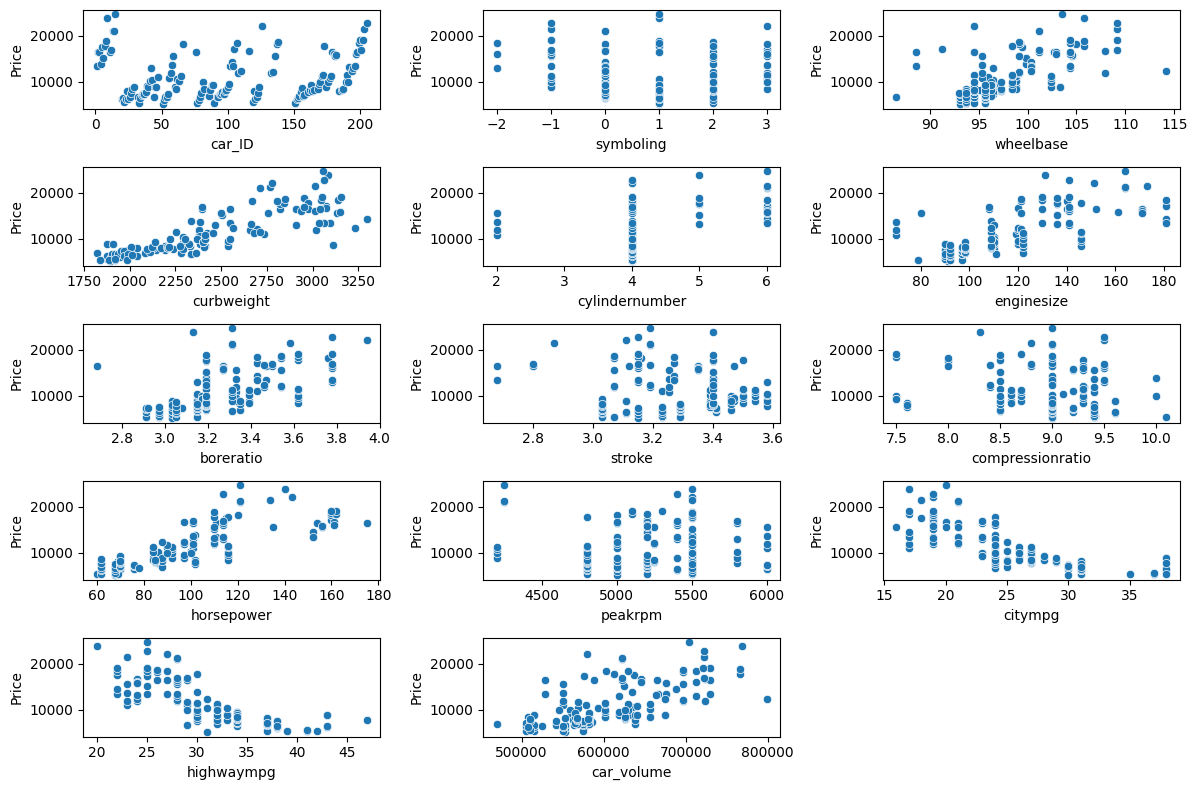

In [24]:
numerical_cols = df.select_dtypes(exclude=['object']).drop('price', axis=1).columns
num_plots = len(numerical_cols)
num_rows = (num_plots - 1) // 3 + 1  # Calculate the number of rows needed

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 3, i+1)  # Adjust the number of columns to 3
    sns.scatterplot(x=col, y='price', data=df)
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric = df.select_dtypes(exclude=["object"])
numeric = numeric.drop("price", axis=1)
dropped_vars = []

for i in range(14):
    vif = pd.DataFrame()
    vif["Variable"] = numeric.columns
    vif["VIF"] = [variance_inflation_factor(numeric.values, i) for i in range(numeric.shape[1])]
    if (vif["VIF"].max()) >= 10:
        new_columns = vif.sort_values(by="VIF", ascending=False)[1:]['Variable'].unique().tolist()
        print(vif.sort_values(by="VIF", ascending=False))
        print("\n \n \n \n \n ")
        dropped_vars.append(vif.sort_values(by="VIF", ascending=False).iloc[0, 0])
        numeric = numeric[new_columns]

final_columns = vif["Variable"].unique().tolist()
print(vif)


            Variable          VIF
2          wheelbase  2539.455756
6          boreratio  1451.579121
12        highwaympg   975.937645
11           citympg   722.399377
5         enginesize   541.855306
8   compressionratio   471.476384
13        car_volume   459.889557
3         curbweight   427.006502
7             stroke   415.735257
4     cylindernumber   401.705306
10           peakrpm   317.250374
9         horsepower    77.544417
0             car_ID     5.024262
1          symboling     2.792053

 
 
 
 
 
            Variable         VIF
1         highwaympg  965.170809
0          boreratio  870.134843
2            citympg  716.564602
4   compressionratio  467.742257
6         curbweight  411.322049
3         enginesize  395.131804
5         car_volume  346.823089
9            peakrpm  317.203848
8     cylindernumber  284.442373
7             stroke  270.499957
10        horsepower   77.367109
11            car_ID    5.022475
12         symboling    2.558611

 
 
 
 
 
      

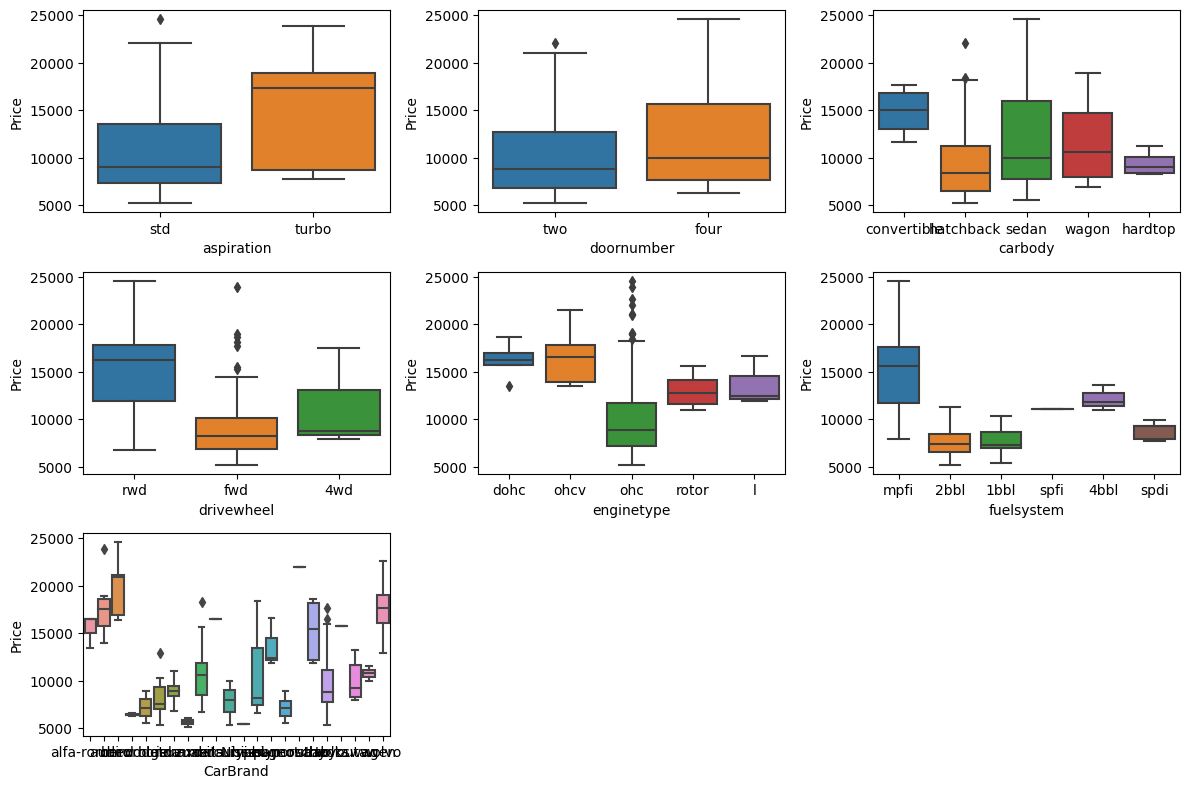

In [26]:
# Visualizing the relationship between categorical features and the target variable
categorical_cols = df.select_dtypes(include=['object']).columns
num_features = len(categorical_cols)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=col, y='price', data=df)
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [28]:
df = df.select_dtypes(include=["object"]).join(df[final_columns])
df = df.join(df_copy["price"])


In [30]:
#get_dummies for categorical variabel
categorical_columns = df.select_dtypes(include=["object"]).columns


In [31]:
for i in categorical_columns :
    dummies_creator = pd.get_dummies(df[i],drop_first= True, prefix = i )
    df = df.join(dummies_creator)
    df=df.drop(columns=[i])

In [32]:
def build_min_max_scaler(df) :
  scaled_columns = pd.DataFrame()
  for i in df.columns:
      min = df[i].min()
      df[i] = df[i]-min
      max = df[i].max()
      scaled_columns[i] = pd.DataFrame( round(df[i]/max ,5) )
  return scaled_columns


df_new = build_min_max_scaler(df.drop("price",axis = 1 ))
df = df_new.join(df["price"])



In [33]:
X = df.drop("price",axis = 1 )
y = df["price"]


In [34]:
X = df.drop("price",axis = 1 )
y = df["price"]
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 15062001 )


In [35]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 110.1 MB/s eta 0:0

In [36]:
from pycaret.regression import *
s=setup(data=df,target='price')

,Description,Value
0,Session id,7791
1,Target,price
2,Target type,Regression
3,Original data shape,"(142, 43)"
4,Transformed data shape,"(142, 43)"
5,Transformed train set shape,"(99, 43)"
6,Transformed test set shape,"(43, 43)"
7,Numeric features,42
8,Preprocess,True
9,Imputation type,simple


In [37]:
cm=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1468.7430,4439894.3411,1978.6276,0.7572,0.1585,0.1321,0.5390
ridge,Ridge Regression,1603.7160,4777776.1375,2068.8422,0.7475,0.1877,0.1544,0.0700
gbr,Gradient Boosting Regressor,1381.3087,4203727.7720,1924.1848,0.7468,0.1627,0.1269,0.3140
br,Bayesian Ridge,1610.9149,4836003.9875,2081.4962,0.7441,0.1885,0.1551,0.1560
rf,Random Forest Regressor,1477.0790,4617672.0414,2009.3308,0.7367,0.1628,0.1330,0.5510
xgboost,Extreme Gradient Boosting,1511.1232,4555774.8125,2056.2032,0.7327,0.1679,0.1341,0.3310
huber,Huber Regressor,1555.7221,5104337.8394,2164.3612,0.7184,0.1960,0.1450,0.2240
ada,AdaBoost Regressor,1613.6682,5271281.9405,2167.9718,0.7109,0.1809,0.1508,0.2790
par,Passive Aggressive Regressor,1756.7688,5653399.4789,2287.2100,0.6857,0.2005,0.1681,0.3500
lightgbm,Light Gradient Boosting Machine,1800.2759,5896056.7133,2298.8126,0.6766,0.1888,0.1617,0.1600


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [38]:
import statsmodels.api as sm

X = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

summary = results.summary()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              243.2
Date:                Sat, 29 Jul 2023   Prob (F-statistic):                    3.55e-59
Time:                        13:26:55   Log-Likelihood:                         -884.66
No. Observations:                 106   AIC:                                      1847.
Df Residuals:                      67   BIC:                                      1951.
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [39]:
y_pred = results.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
mpe = abs (np.mean((y_test - y_pred) / y_test)) * 100
print("Mean Squarred Error :" , mse)
print("Mean Percentage Error : ",mpe)


Mean Squarred Error : 1619.3033792801205
Mean Percentage Error :  2.95606069393805


In [40]:
summary = results.summary()
tables = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)
coefficients_table = tables[0]
sorted_table = coefficients_table.sort_values(by='P>|t|', ascending=False)


In [41]:
tables = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)
coefficients_table = tables[0]
sorted_table = coefficients_table.sort_values(by='P>|t|', ascending=False)
pd.DataFrame(sorted_table)

,coef,std err,t,P>|t|,[0.025,0.975]
CarBrand_peugeot,9.164800e+01,1.154434e+03,0.079,0.937,-2.212612e+03,2.395907e+03
enginetype_l,9.164800e+01,1.154434e+03,0.079,0.937,-2.212612e+03,2.395907e+03
drivewheel_rwd,-1.497389e+02,1.205501e+03,-0.124,0.902,-2.555929e+03,2.256451e+03
fuelsystem_2bbl,-2.234261e+02,1.544780e+03,-0.145,0.885,-3.306820e+03,2.859968e+03
doornumber_two,-1.667633e+02,4.753870e+02,-0.351,0.727,-1.115641e+03,7.821140e+02
CarBrand_nissan,-6.616592e+02,1.410739e+03,-0.469,0.641,-3.477506e+03,2.154188e+03
symboling,-6.145619e+02,1.180450e+03,-0.521,0.604,-2.970749e+03,1.741625e+03
fuelsystem_4bbl,-9.677038e+02,1.065271e+03,-0.908,0.367,-3.093994e+03,1.158586e+03
enginetype_rotor,-9.677038e+02,1.065271e+03,-0.908,0.367,-3.093994e+03,1.158586e+03
CarBrand_mitsubishi,1.327934e+03,1.386720e+03,0.958,0.342,-1.439970e+03,4.095838e+03


# **# Model**

In [42]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [43]:
# Generate a random regression dataset (example)
X, y = make_regression(n_samples=100, n_features=10, random_state=42)

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [45]:
# Create an Extra Trees regression model
model = ExtraTreesRegressor()

In [46]:
# Train the model on the training data
model.fit(X_train, y_train)

ExtraTreesRegressor()

In [47]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [48]:
# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6752.581858112474


# **obsevations:**

***In the above data exploration we have carried out over the following topics:***

Data Preprocessing:
Clean the data and perform preprocessing steps to handle missing values, remove duplicates, and handle outliers if any. Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.

Data Exploration and Visualization:
Analyze the dataset to gain insights into the distribution of car prices and the relationships between features and the target variable (car price). Visualization libraries like Matplotlib or Seaborn can help in exploring the data through various plots and charts.

Feature Engineering:
Create or derive new features from the existing data if necessary. Feature engineering might involve combining features, extracting useful information, or transforming existing features to better represent the data.

Data Splitting:
Split the dataset into training and testing sets. The training set will be used to train the machine learning model, while the testing set will be used to evaluate its performance.